IMPORT DATA

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/My Drive/laggedTrain .csv', encoding='iso-8859-1')
test = pd.read_csv('/content/drive/My Drive/laggedTest.csv', encoding='iso-8859-1')

In [ ]:
train.shape

(168336, 57)

In [ ]:
test.shape

(42336, 57)

In [ ]:
full=pd.concat([train,test])

In [ ]:
full=full.dropna(axis=0)


In [ ]:
full_cleaned=full[["mean","X..Smokers","X..Adults.with.Obesity","X..With.Access.to.Exercise.Opportunities","Premature.age.adjusted.mortality","latitude", 'cumulative_cases1', 'cumulative_deaths1', 'new_cases1', 'new_deaths1','cumulative_cases2', 'cumulative_deaths2', 'new_cases2', 'new_deaths2','cumulative_cases3', 'cumulative_deaths3', 'new_cases3', 'new_deaths3','cumulative_cases4', 'cumulative_deaths4', 'new_cases4', 'new_deaths4','cumulative_cases5', 'cumulative_deaths5', 'new_cases5', 'new_deaths5']]

In [ ]:
x_full_cleaned=full_cleaned.values[:,:-1]  
y_full_cleaned=full_cleaned.values[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_full_cleaned, y_full_cleaned, test_size=0.20, random_state=42)

We firstly create and fit the models to our training data.
Our models are:
- Linear Regressor
- Regression Tree
- Random Forest
- Neural Network

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_tree=DecisionTreeRegressor(max_depth=10,splitter='best')
reg_tree.fit(x_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
best_rf=RandomForestRegressor(n_estimators=50, criterion="mse")
best_rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
import keras
import random
model=keras.Sequential()
model.add(keras.layers.Dense(units=55,activation='relu'))
model.add(keras.layers.Dense(units=80,activation='relu'))
model.add(keras.layers.Dense(units=80,activation='relu'))
model.add(keras.layers.Dense(units=80,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1,activation='linear'))
RMSprop=keras.optimizers.RMSprop(learning_rate=0.001,decay=0.0001)
model.compile(optimizer= RMSprop,loss='mse',metrics=['mse','mae'])
es=keras.callbacks.EarlyStopping(monitor='val_mse', mode='min', verbose=1, patience=11,min_delta=0.5)
history_best=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,callbacks=[es])

Now we must run Repeated KFold Cross Validation on our 4 models in order to obtain the 4 arrays of scores. We have 10 folds, 3 repeats.

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold = RepeatedKFold(n_splits=10, n_repeats=3)

In [ ]:
scoresLr = cross_val_score(lr, x_full_cleaned, y_full_cleaned, scoring = "neg_mean_squared_error",cv = kfold, n_jobs=1)

In [ ]:
scoresLr

array([-0.80100059, -0.32077517, -0.51231243, -0.9089501 , -0.37290678,
       -3.65274834, -0.23279747, -0.234817  , -0.32621548, -0.29694821,
       -0.19891032, -1.19548555, -0.2400416 , -0.25025321, -2.50311464,
       -1.59228726, -0.38501614, -0.3038785 , -0.43148342, -0.50642736,
       -0.26379217, -1.33764111, -1.51599351, -0.46249429, -0.19270228,
       -0.35536856, -2.46865427, -0.31424902, -0.39239366, -0.34906444])

In [ ]:
scoresReg = cross_val_score(reg_tree, x_full_cleaned, y_full_cleaned, scoring = "neg_mean_squared_error",cv = kfold, n_jobs=1)

In [ ]:
scoresReg

array([-0.64003279, -3.64157135, -6.12330452, -0.28956462, -0.30474904,
       -0.28331563, -0.27865081, -0.46405583, -1.86210475, -1.14644633,
       -1.52119725, -2.37171093, -0.29905385, -1.32531201, -0.24250454,
       -1.92061071, -0.37269664, -0.43097299, -0.38253504, -1.69669408,
       -0.33629342, -1.49023751, -0.38617895, -2.27133302, -0.39163764,
       -0.37263183, -0.83430736, -0.57959682, -2.40727778, -1.13144703])

In [ ]:
scoresRF = cross_val_score(best_rf, x_full_cleaned, y_full_cleaned, scoring = "neg_mean_squared_error",cv = kfold, n_jobs=1)

In [ ]:
scoresRF

array([-1.45401575, -1.94095673, -0.23038225, -0.3624044 , -0.25666877,
       -0.47598843, -0.2006821 , -1.49085131, -0.30386188, -0.17776871,
       -0.20903946, -0.30418374, -0.24051179, -0.33692331, -1.30422662,
       -1.73635022, -1.55950711, -0.25528923, -0.23057558, -0.13783048,
       -0.62905815, -2.24784949, -0.87296322, -0.37311557, -0.30487849,
       -0.25645786, -1.34365943, -0.25542199, -0.21440164, -0.26790329])

In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from tensorflow.keras.models import * 
from tensorflow.keras.layers import * 
from tensorflow.keras.optimizers import *
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def buildmodel():
    model= Sequential([
        Dense(55, activation="relu"),
        Dense(80,activation='relu'),
        Dense(80,activation='relu'),
        Dense(80,activation='relu'),
        Dropout(0.3),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001,decay=0.0001), loss='mse', metrics=['mse'])
    return model

In [ ]:
estimator= KerasRegressor(build_fn=buildmodel, epochs=12, batch_size=64, verbose = 0)

In [ ]:
results = cross_val_score(estimator,x_full_cleaned, y_full_cleaned, scoring= "neg_mean_squared_error", cv=kfold, n_jobs=-1)

In [ ]:
results

array([-0.94843396, -2.2644399 , -0.21793071, -0.12601155, -1.53404781,
       -0.54657431, -0.13028765, -0.21886342, -0.36134329, -0.2246885 ,
       -0.23296032, -0.12993309, -1.41587746, -0.17260429, -0.25407504,
       -2.325107  , -0.53289203, -0.32776746, -0.15290453, -1.05774367,
       -0.48618262, -0.17110321, -1.42857365, -0.22739259, -2.33455159,
       -0.23051749, -1.22114112, -0.15254066, -0.18105536, -0.1638357 ])

First, we define the null hypothesis for our Statistical Hypothesis Tests.
H0: the performances of the models are the same (the scores come from the same distribution).

We pick a significance level of a=0.05.

The first thing we want to do is perform the ANOVA test on our scores from the Repeated Cross Validation.

ANOVA has some important assumptions about our data:


1.   Each group sample is drawn from a normally distributed population: we plot the scores for the models.


array([-0.80100059, -0.32077517, -0.51231243, -0.9089501 , -0.37290678,
       -3.65274834, -0.23279747, -0.234817  , -0.32621548, -0.29694821,
       -0.19891032, -1.19548555, -0.2400416 , -0.25025321, -2.50311464,
       -1.59228726, -0.38501614, -0.3038785 , -0.43148342, -0.50642736,
       -0.26379217, -1.33764111, -1.51599351, -0.46249429, -0.19270228,
       -0.35536856, -2.46865427, -0.31424902, -0.39239366, -0.34906444])

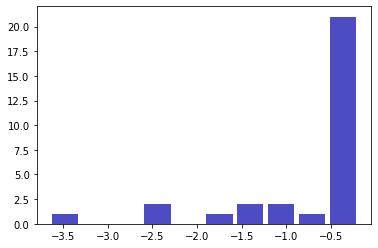

In [ ]:
pyplot.hist(scoresLr,bins='auto', color='#0300aa', alpha=0.7, rwidth=0.85)
scoresLr

(array([ 1.,  0.,  0.,  1.,  0.,  5.,  6., 17.]),
 array([-6.12330452, -5.38820452, -4.65310453, -3.91800453, -3.18290453,
        -2.44780454, -1.71270454, -0.97760454, -0.24250454]),
 <a list of 8 Patch objects>)

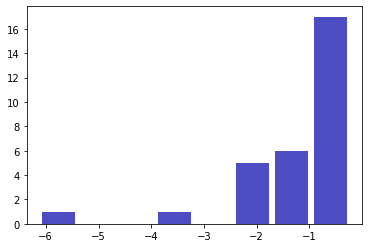

In [ ]:
pyplot.hist(scoresReg,bins='auto', color='#0300aa', alpha=0.7, rwidth=0.85)

(array([ 1.,  1.,  1.,  3.,  2.,  0.,  1.,  1.,  3., 17.]),
 array([-2.24784949, -2.03684759, -1.82584569, -1.61484379, -1.40384189,
        -1.19283999, -0.98183809, -0.77083619, -0.55983428, -0.34883238,
        -0.13783048]),
 <a list of 10 Patch objects>)

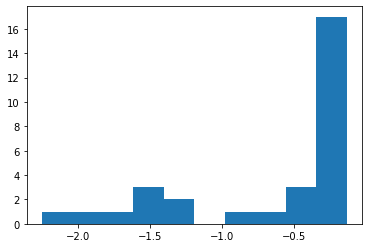

In [ ]:
pyplot.hist(scoresRF,bins='auto', color='#0300aa', alpha=0.7, rwidth=0.85)

(array([ 3.,  0.,  0.,  1.,  2.,  2.,  1.,  0.,  4., 17.]),
 array([-2.33455159, -2.11369758, -1.89284358, -1.67198958, -1.45113557,
        -1.23028157, -1.00942757, -0.78857356, -0.56771956, -0.34686555,
        -0.12601155]),
 <a list of 10 Patch objects>)

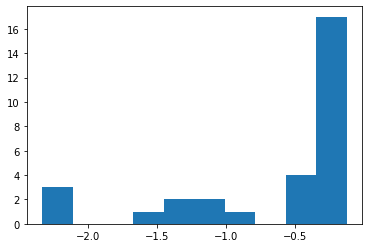

In [ ]:
pyplot.hist(results,bins='auto', color='#0300aa', alpha=0.7, rwidth=0.85)

The scores plotted are all negative mean squared errors; it makes sense that our graphs are all skewed to the left. We had mean errors that we squared thus all became positive, Then we negated these values and they all flipped to the left side of the plot. The initial distribution of the errors before squaring and negating  might have been normal. We will assume that is true and move on for the paired student test. 

2.   All populations have a common variance: for this assumption, we looked at the boxplots of the scores.

Linear Regression    0.696077
Regression Tree      1.610493
Random Forest        0.397817
Neural Network       0.500130
dtype: float64

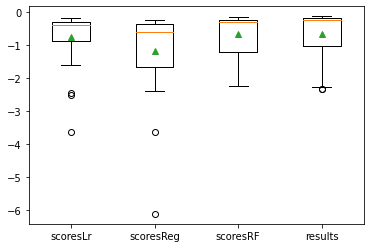

In [ ]:

dataset = pd.DataFrame({'Linear Regression': scoresLr, 'Regression Tree': scoresReg, "Random Forest":scoresRF, "Neural Network": results}, columns=["Linear Regression",'Regression Tree', "Random Forest","Neural Network"])
pyplot.boxplot([scoresLr,scoresReg,scoresRF,results], labels = ["scoresLr","scoresReg","scoresRF","results"], showmeans=True)
dataset.var()


The variances of the scores of the models are close, except for the regression tree. We will do ANOVA first with the 4 models, then again without the regression tree.

3.   All samples are drawn independently of each other: the 4 models were developed independently.

4. Within each sample, the observations are sampled randomly and independently of each other:  in the repetitions for every iteration of the RepeatedKFold, we are getting 3 scores that aren’t exactly independent. Nevertheless, we will assume that they are sufficiently independent for the purpose of performing ANOVA.

Now we perform the ANOVA using the f_oneway function:

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
from matplotlib import pyplot

In [ ]:
import scipy as py
from scipy import stats
withReg = stats.f_oneway(scoresLr, scoresReg, scoresRF, results)
withoutReg = stats.f_oneway(scoresLr, scoresRF, results)
print(withReg)
print(withoutReg)

F_onewayResult(statistic=2.3985512942981706, pvalue=0.07154390358924562)
F_onewayResult(statistic=0.19468245411982033, pvalue=0.8234535776675506)


The p-value with the scores of the Regression Tree included is p1=0.07 > a=0.05. But this p-value is really close to 0.05; it suggests that the performances might come from the same distribution but the p-value isn’t large enough to convince us. 
The p-value without the scores of the regression tree is p2 = 0.8, which indicates firstly that since p-value>a=0.05, our performances are probably the same. Secondly, it indicates that, to some extent the Linear Regressor, Random Forest, and Neural Network have more supporting evidence for being almost equivalent in performance since p2>p1. This is an interesting observation that shall reveal itself in the paired student tests performed below.

We will now perform the paired students test for every pair of models.

0.26153531760178633


{'boxes': [<matplotlib.lines.Line2D at 0x7f74648a0e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f74648a00b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f746487bef0>,
 'means': [<matplotlib.lines.Line2D at 0x7f746487b5c0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f746487ba90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f74648a07b8>,
  <matplotlib.lines.Line2D at 0x7f74648eb048>]}

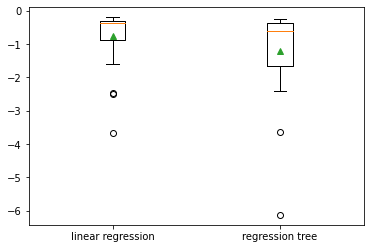

In [ ]:
t1,p1=paired_ttest_5x2cv(estimator1=lr,estimator2=reg_tree,X=x_full_cleaned,y=y_full_cleaned,scoring='neg_mean_squared_error',random_seed=1)
print(p1)
pyplot.boxplot([scoresLr, scoresReg], labels=['linear regression', 'regression tree'], showmeans=True)

1. Linear Regression and Regression Tree: 

> P-value = 0.26>0.05: this indicates that the two scores of the models come from the same distribution. In other words, any apparent differences in performance are probably not real. Since linear regression is a lot less computationally expensive, so far, we would pick LR as the most suitable model.




0.23695152901060287


{'boxes': [<matplotlib.lines.Line2D at 0x7f746066cda0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f746066c588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7460672438>,
 'means': [<matplotlib.lines.Line2D at 0x7f74606727b8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7460672390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f746066c7b8>,
  <matplotlib.lines.Line2D at 0x7f74629efe48>]}

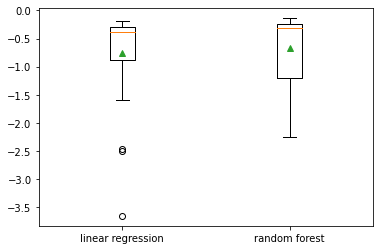

In [ ]:
t2,p2=paired_ttest_5x2cv(estimator1=lr,estimator2=best_rf,X=x_full_cleaned,y=y_full_cleaned,scoring='neg_mean_squared_error',random_seed=1)
print(p2)
pyplot.boxplot([scoresLr, scoresRF], labels=['linear regression', 'random forest'], showmeans=True)

2. Linear regression and random forest: 
> P-value = 0.23 > 0.05: same explanation as above; the 2 models probably have the same performance. We would still pick LR over the random forest; however we note that the LR model has more outliers but less variance.


0.030752699642395343


{'boxes': [<matplotlib.lines.Line2D at 0x7f74604a84e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f74604a8ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f74604a1cf8>,
 'means': [<matplotlib.lines.Line2D at 0x7f74604a19b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f74604a1630>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f74604a87f0>,
  <matplotlib.lines.Line2D at 0x7f74604997b8>]}

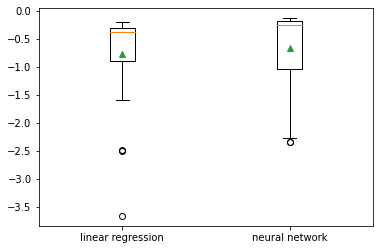

In [ ]:
t3,p3=paired_ttest_5x2cv(estimator1=lr,estimator2= model,X=x_full_cleaned,y=y_full_cleaned,scoring='neg_mean_squared_error',random_seed=1)
print(p3)
pyplot.boxplot([scoresLr, results], labels=['linear regression', 'neural network'], showmeans=True)

3. Linear Regression and Neural Network
> Linear and Neural Network:
P-value = 0.03<0.05: this indicates that the models probably have different performances. In the boxplots, the box for NN scores is closer to zero than that of the linear regression; NN scores also have less outliers.

NN may have significantly improved our scores over linear regression.

0.01693495760106096


{'boxes': [<matplotlib.lines.Line2D at 0x7f7460368940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7460356390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f746035e198>,
 'means': [<matplotlib.lines.Line2D at 0x7f7460356e10>,
 'medians': [<matplotlib.lines.Line2D at 0x7f7460356a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7460368c50>,
  <matplotlib.lines.Line2D at 0x7f746035ec18>]}

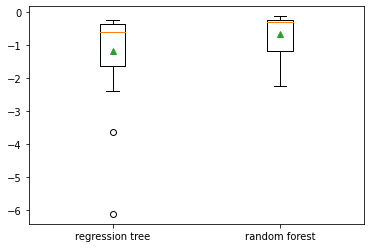

In [ ]:
t4,p4=paired_ttest_5x2cv(estimator1=reg_tree,estimator2=best_rf,X=x_full_cleaned,y=y_full_cleaned,scoring='neg_mean_squared_error',random_seed=1)
print(p4)
pyplot.boxplot([scoresReg, scoresRF], labels=['regression tree', 'random forest'], showmeans=True)

4. Regression Tree to Random Forest: 
> P-value = 0.0169 < 0.05: this indicates that the scores might come from different distributions, and that the 2 models probably perform differently. From the boxplot, we clearly see Random Forest performs better (its box is closer to zero and smaller => less variance in scores).


0.02065445787221688


{'boxes': [<matplotlib.lines.Line2D at 0x7f74604b4588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f74604b4f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f74604f1da0>,
 'means': [<matplotlib.lines.Line2D at 0x7f74604f1a58>,
 'medians': [<matplotlib.lines.Line2D at 0x7f74604f16d8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f74604b4898>,
  <matplotlib.lines.Line2D at 0x7f74604f2898>]}

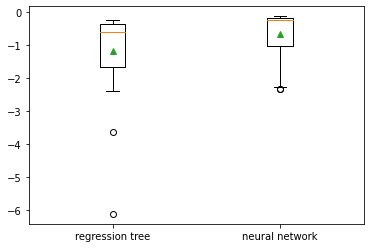

In [ ]:
t5,p5=paired_ttest_5x2cv(estimator1=reg_tree,estimator2=model,X=x_full_cleaned,y=y_full_cleaned,scoring='neg_mean_squared_error',random_seed=1)
print(p5)
pyplot.boxplot([scoresReg, results], labels=['regression tree', 'neural network'], showmeans=True)

5. Regression Tree and Neural Network: 
> P-value = 0.02<0.05: this indicates that the scores might come from different distributions, and that the 2 models probably perform differently. From the boxplot, the NN clearly performs better than the regression tree.(the NN box is closer to zero and smaller => less variance in scores)

NN is probably still the best candidate we have in terms of performance.


0.9199238427661247


{'boxes': [<matplotlib.lines.Line2D at 0x7f746059e208>,
 'caps': [<matplotlib.lines.Line2D at 0x7f746059ec18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f74605aca20>,
 'means': [<matplotlib.lines.Line2D at 0x7f74605ac6d8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f74605ac358>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f746059e518>,
  <matplotlib.lines.Line2D at 0x7f7460586518>]}

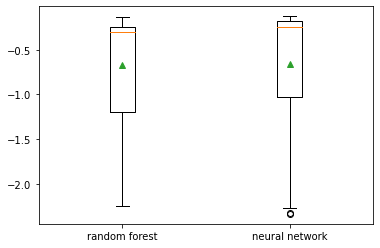

In [ ]:
t6,p6=paired_ttest_5x2cv(estimator1=best_rf,estimator2=model,X=x_full_cleaned,y=y_full_cleaned,scoring='neg_mean_squared_error',random_seed=1)
print(p6)
pyplot.boxplot([scoresRF, results], labels=['random forest', 'neural network'], showmeans=True)

6. Random forest and NN: 
> P-value = 0.9>0.05: they both perform really well; the p-value is high; so we can say that these 2 models have very similar performance and either of them could be a perfect candidate as our final model. 

Finally, we have deduced the NN has better performance than all of our models and we chose it as our final model. We have enough evidence to believe it is better than all the other models, even though it comes close to the random forest. It is the more consistent model.


For the second part, we examine the scores of our model before an after feature selection.

In [ ]:
results_before = cross_val_score(estimator,x_full, y_full, scoring= "neg_mean_squared_error", cv=kfold, n_jobs=-1)

In [ ]:
#scores before feature selection
import numpy as np
import scipy as sp
results_before = [-0.1643944 , -0.25363338, -0.29761069, -0.20355043, -3.03163229,
       -0.21344779, -0.31316571, -1.47953275, -0.54823126, -0.1661691 ,
       -0.17879384, -0.46485201, -0.30112412, -3.04693411, -1.42774242,
       -0.15625426, -0.15373241, -0.53071353, -0.19364267, -0.17252875,
       -3.63104736, -0.19539255, -0.17176822, -0.67845346, -0.24717318,
       -0.14997111, -0.34144419, -0.87035889, -0.16621964, -0.2432434 ]
results_before = np.array(results_before)

In [ ]:
from scipy import stats
tStat, pValue =  stats.ttest_rel(results, results_before)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
stats.chi2_contingency

P-Value:0.973652809048702 T-Statistic:0.03331352020408335


P-value: 0.973 > 0.05: 
> Therefore, we fail to reject the null hypothesis; this means that any observed difference between the performance of the NN before and after feature selection is probably not real. This leads us to believe that the many features weren't causing the model to perform badly, but also weren't necessarily making it any better.

The p-value on its own isn't very telling. We plot the boxplots of the scores.

In [ ]:
pyplot.boxplot(results, results_before)

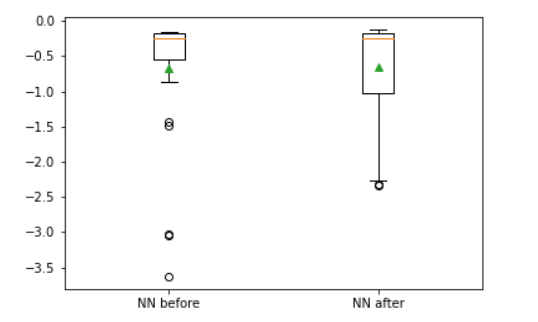

The boxplots show us how before feature selection, the variance of the scores was significantly smaller; however, we had many more outliers. After feature selection, our scores became more spread out but with less outliers. Now the question is whether we would rather have more varying scores and less extreme errors (NN after feature selection), or less varying scores but more extreme outliers in the scores. In the case of reporting corona-virus deaths, extreme outliers are very alarming. If a scientist in a governmental agency uses a model, predicts a very large number of deaths upon which strict measures are applied to an area, but then turns out the prediction is far from true, a lot of chaos and panic will incur. Moreover, after feature selection, our box isn’t too bad, and outliers are very limited. We can safely say that extreme outliers were decreased by feature selection, for the price of larger variance in prediction accuracy. We can’t make the decision of whether or not to train our model with or without the features without consulting an expert in the field, who can guide us on what people using our predicting model care about more.